# Ekstremi funkcija

In [60]:
import math
import csv
import os.path
import sys
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
from matplotlib import cm
from IPython.display import YouTubeVideo

%matplotlib agg

## Lokalni ekstremi

**Definicija 1.** _Neka je $A \subseteq \mathbb{R^n}$ otvoren, $f: A\rightarrow \mathbb{R}$ i $c \in A.$_
- _Ako postoji okolina $U(c)$ na kojoj je $f(c)$ maksimum_
$( \forall x \in U(c) \hspace{3mm} f(c) \ge f(x) ),$
_kažemo da je $c$ **lokalni maksimum**, a $f(c)$ je vrijednost lokalnog maksimuma._
- _Ako postoji okolina $U(c)$ na kojoj je $f(c)$ minimum_
$(\forall x \in U(c) \hspace{3mm} f(c) \le f(x)),$
_kažemo da je $c$ **lokalni minimum**, a $f(c)$ je vrijednost lokalnog minimuma._
- _$c$ je **lokalni ekstrem** ako je lokalni minimum ili lokalni minimum funkcije $f$._

- _$c$ je **stacionarna točka** ako je funkcija $f$ diferencijabilna u $c$ i $Df(c) = 0$_

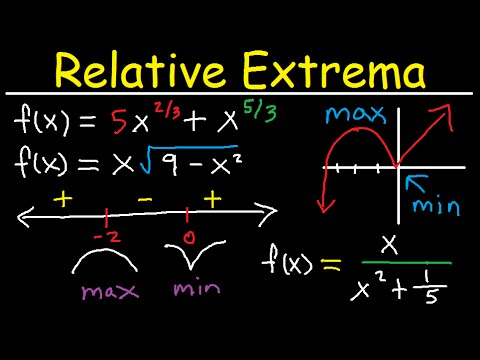

In [61]:
YouTubeVideo('VZuJ4bGj2D0')

**Lokalni maksimum:**

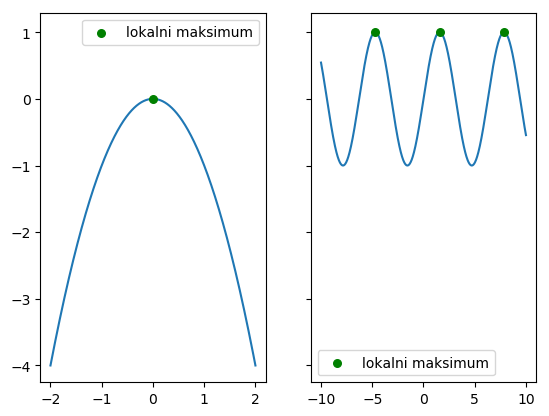

In [62]:
%matplotlib agg

fig, (lijevo, desno) = plt.subplots(1, 2, sharey=True)
x = np.linspace(-2, 2, 1000)
lijevo.plot(x, -x**2, zorder=1)
lijevo.scatter(0, 0, s=30, c='g', zorder=2, label='lokalni maksimum')
lijevo.legend()

x = np.linspace(-10, 10, 1000)
desno.plot(x, np.sin(x), zorder=1)
X=[math.pi/2, math.pi/2 + 2*math.pi, math.pi/2 - 2*math.pi]
Y=[1, 1, 1]
desno.scatter(X, Y, s=30, c='g', zorder=2, label='lokalni maksimum')
desno.legend()

fig

**Lokalni minimum:**

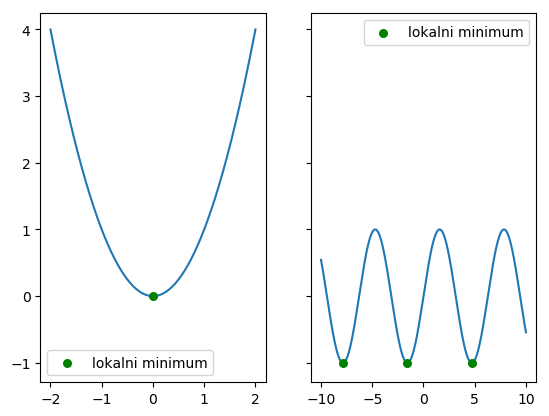

In [63]:
%matplotlib agg

fig, (lijevo, desno) = plt.subplots(1, 2, sharey=True)
x = np.linspace(-2, 2, 1000)
lijevo.plot(x, x**2, zorder=1)
lijevo.scatter(0, 0, s=30, c='g', zorder=2, label='lokalni minimum')
lijevo.legend()

x = np.linspace(-10, 10, 1000)
desno.plot(x, np.sin(x), zorder=1)
X=[-math.pi/2, -math.pi/2 + 2*math.pi, -math.pi/2 - 2*math.pi]
Y=[-1, -1, -1]
desno.scatter(X, Y, s=30, c='g', zorder=2, label='lokalni minimum')
desno.legend()

fig

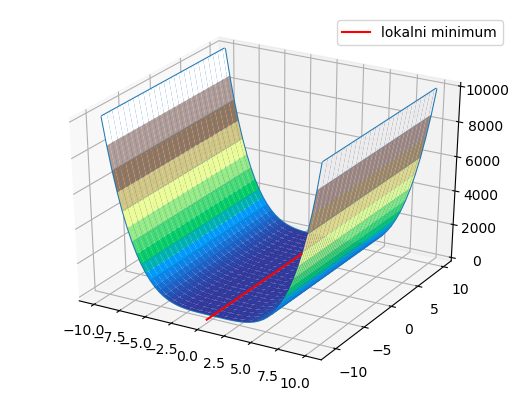

In [64]:
%matplotlib agg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
z = x**4
ax.plot_wireframe(x, y, z, rstride=2, cstride=2)
ax.plot_surface(x, y, z, cmap='terrain', linewidth=1)

ax2 = fig.gca(projection='3d')
y = np.linspace(-11, 5.5, 100)
x = 0 * y
z = 0 
ax2.plot(x, y, z, c='r', label='lokalni minimum')
ax2.legend()

fig

**Teorem 2. (Nužan uvjet za lokalni ekstrem)** _Neka je $A \subseteq \mathbb{R^n}$ otvoren i $f: A\rightarrow \mathbb{R}$ diferencijabilna u $c \in A$. Ako je $c$ lokalni ekstrem funkcije $f$ onda je $Df(c)=0$ (tj. $c$ je stacionarna točka funkcije $f$)._

**Teorem 3. (Dovoljni uvjeti za lokalni ekstrem)** _Neka je $A \subseteq \mathbb{R^n}$ otvoren i $f: A\rightarrow \mathbb{R}$ klase $C^2$._
- _Ako je $c \in A$ stacionarna točka i $H_f(c)$ je negativno definitna matrica onda $f$ ima lokalni maksimum u $c$._
- _Ako $f$ ima lokalni maksimum u $c$ onda je $H_f(c)$ negativno semidefinitna._
- _Ako je $c \in A$ stacionarna točka i $H_f(c)$ je pozitivno definitna matrica onda $f$ ima lokalni minimum u $c$._
- _Ako $f$ ima lokalni minimum u $c$ onda je $H_f(c)$ pozitivno semidefinitna._
- _Ako je $c \in A$ stacionarna točka i $H_f(c)$ je indefinitna matrica onda $f$ nema u točki $c$ lokalni ekstrem, tj. $c$ je sedlasta točka funkcije $f$._

Prethodna dva teorema nam daju način **kako analitički odrediti lokalne ekstreme** neke funkcije:
1. Odredimo sve točke $c \in A$ takve da $Df(c)=0$. Po Teoremu 2. one su kandidati za lokalne ekstreme.
2. Za njih izračunamo $H_f(c)$.
3. Iskoristimo Teorem 3.

In [65]:
def grad(f,var):
    return [sp.diff(f,x) for x in var]

def hess(f,var):
    return sp.Matrix([[f.diff(x).diff(y) for x in var] for y in var])

x,y = sp.symbols('x y')

def f(x,y):
    return x**2 + y**2

Možemo izračunati gradijent i Hessian u nekoj točki, npr. u točki $(1,1)$ da vidimo je li u njoj lokalni ekstrem. Po obratu po kontrapoziciji Teorema 2 znamo da u $(1,1)$ nije lokalni ekstrem funkcije $f(x,y)=x^2+y^2$ jer $Df(1,1)=(2,2)$

In [66]:
# evaluacija gradijenta u (1,1)
[i.n(5, subs={x: 1, y: 1}) for i in grad(f(x,y), [x,y])]

[2.0000, 2.0000]

**Primjer 4.** Nađimo lokalne ekstreme funkcije $f(x,y)=x^2+y^2$.

In [67]:
def f(x,y):
    return x**2 + y**2

g = grad(f(x,y), [x,y])
print("Gradijent funkcije f je: ",g)

stac_tocka = sp.solve(g, sp.symbols('x y'))
print("Stacionarne točke:", stac_tocka)

Gradijent funkcije f je:  [2*x, 2*y]
Stacionarne točke: {y: 0, x: 0}


Jedini kandidat je točka $(0,0)$.

In [68]:
h = hess(f(x,y), [x,y])
print("Hessian funkcije f:")
h   # ovisi o x i y

Hessian funkcije f:


Matrix([
[2, 0],
[0, 2]])

In [69]:
temp = h.eigenvals()
print("Svojstvene vrijednosti:", temp)

Svojstvene vrijednosti: {2: 2}


In [70]:
def is_pos_def(d):
    for key in d:
        if key <= 0:
            return False
    return True

is_pos_def(temp)

True

Vidimo da je $H_f(0,0)$ pozitivno definitna pa po Teoremu 3. zaključujemo da funkcija $f$ u $(0,0)$ ima lokalni minimum. Sljedeći graf potvrđuje naš nalaz.

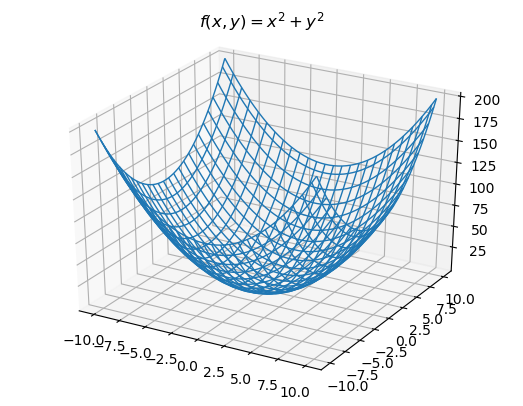

In [71]:
%matplotlib agg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
z = f(x,y)
ax.plot_wireframe(x, y, z, rstride=2, cstride=2, linewidth=1)
ax.set_title('$f(x,y)=x^2+y^2$', y=1.05)

fig

**Primjer 5.** Nađimo lokalne ekstreme funkcije $f(x,y)=-(x-2)^2-(y+1)^2$.

In [72]:
x,y = sp.symbols('x y')

def f(x,y):
    return -(x - 2)**2 - (y + 1)**2

g = grad(f(x,y), [x,y])
print("Gradijent funkcije f je:", g)

stac_tocka = sp.solve(g, sp.symbols('x y'))
print("Stacionarne točke:", stac_tocka)

Gradijent funkcije f je: [-2*x + 4, -2*y - 2]
Stacionarne točke: {x: 2, y: -1}


Jedini kandidat je točka $(2,-1)$.

In [73]:
h = hess(f(x,y), [x,y])
h    # ovisi o x i y

Matrix([
[-2,  0],
[ 0, -2]])

In [74]:
Delta1 = sp.lambdify((x,y), h[0,0])
print("Delta1:", Delta1(2,-1))

temp = h.det()
Delta2 = sp.lambdify((x,y), temp)
print("Delta2:", Delta2(2,-1))

Delta1: -2
Delta2: 4


Koristimo **Sylvesterov kriterij**. U našem slučaju:
$$\Delta _1 = h_1 = -2 < 0$$
$$\Delta _2 = det(H_f(2,-1)) = 4 > 0$$

Zaključujemo da je $H_f(2,-1)$ negativno definitna pa iz Teorema 3. slijedi da funkcija $f$ u $(2,-1)$ ima lokalni maksimum.

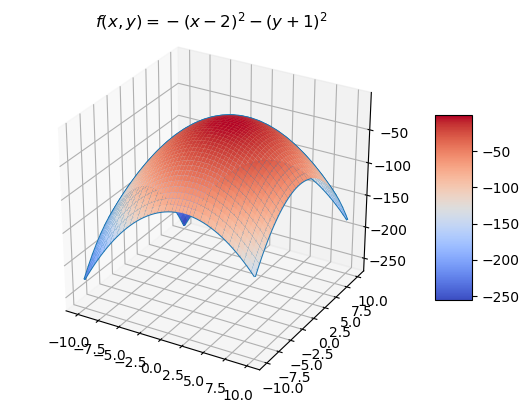

In [75]:
%matplotlib agg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
z = f(x,y)
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.plot_wireframe(x, y, z, rstride=2, cstride=2)
ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=1)
ax.set_title('$f(x,y)=-(x - 2)^2 - (y + 1)^2$', y=1.05)

fig

**Primjer 6.** Nađimo lokalne ekstreme funkcije $f(x,y,z,w) = 5(x-3)^3 + 9(y-2)^2 - 9(z+3)^3 - 11(w+2)^2$.

In [76]:
x,y,z,w = sp.symbols('x y z w')

def f(x,y,z,w):
    return 5*(x - 3)**2 + 9*(y - 2)**2 - 9*(z + 3)**3 - 11*(w + 2)**2

g = grad(f(x,y,z,w),[x,y,z,w])
print("Gradijent funkcije f je:",g)

stac_tocka = sp.solve(g, sp.symbols('x y z w'))
print("Stacionarne točke:", stac_tocka)

Gradijent funkcije f je: [10*x - 30, 18*y - 36, -27*(z + 3)**2, -22*w - 44]
Stacionarne točke: [(3, 2, -3, -2)]


Jedini kandidat je točka $(3, 2, -3, -2)$.

In [77]:
h = hess(f(x,y,z,w),[x,y,z,w])
h    # ovisi o x i y

Matrix([
[10,  0,           0,   0],
[ 0, 18,           0,   0],
[ 0,  0, -54*z - 162,   0],
[ 0,  0,           0, -22]])

In [78]:
Delta1 = sp.lambdify((x,y,z,w),h[0,0])
print("Delta1:", Delta1(3,2,-3,-2))

temp = h[0:2,0:2].det()
Delta2 = sp.lambdify((x,y,z,w),temp)
print("Delta2:", Delta2(3,2,-3,-2))

temp = h[0:3,0:3].det()
Delta3 = sp.lambdify((x,y,z,w),temp)
print("Delta3:", Delta3(3,2,-3,-2))

temp = h.det()
Delta4 = sp.lambdify((x,y,z,w),temp)
print("Delta4:", Delta4(3,2,-3,-2))

Delta1: 10
Delta2: 180
Delta3: 0
Delta4: 0


Imamo: $$\Delta _1 = 10 > 0$$
       $$\Delta _2 = 180 > 0$$
       $$\Delta _3 = 0 \ge 0$$
       $$\Delta _4 = 0 \ge 0$$
       
Slijedi da je $H_f(3,2,-3,2)$ pozitivno semidefinitna.

U $(3,2,-3,2)$ može biti lokalni minimum ili sedlasta točka.

## Gradijentna metoda

**Algoritam** (tražimo lokalni **minimum**):

$x \gets$ slučajno odabrani vektor <br/>
**do**: <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x \gets (x - \lambda \nabla f(x))$ <br/>
**while** nije ispunjen uvjet zaustavljanja <br/>
**return $x$**

Napomena: Za maksimum bi bilo $x \gets (x + \lambda \nabla f(x))$.

In [79]:
def grad_met(f, var, lamda, aproks):
    lista = [aproks]
    for i in range(1000):
        temp = np.asarray( sp.lambdify(var, grad(f,var))(aproks[0], aproks[1]) )
        new = aproks - lamda * temp
        if np.linalg.norm(aproks - new) < 10**-10:
            return new, lista
        aproks = new
        lista.append(np.ndarray.tolist(aproks))
    return aproks, lista

**Primjer 8.** Iskoristimo gradijentnu metodu na funkciji $f(x,y) = x^2 + y^2$ s inicijalnom aproksimacijom $(80,100)$ i $\lambda = 0.1$

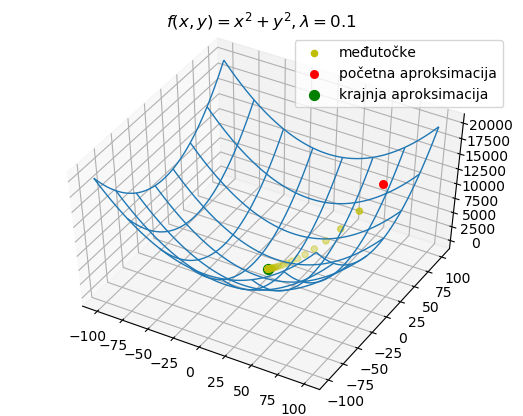

In [80]:
x,y = sp.symbols('x y')

def f(x,y):
    return x**2 + y**2

aproks, history = grad_met(f(x,y), [x,y], 0.1, [80,100])

for el in history:
    el.extend([f(el[0],el[1])])

X = []
Y = []
Z = []
for i in range(len(history)-2):
    X.extend([history[i+1][0]])
    Y.extend([history[i+1][1]])
    Z.extend([history[i+1][2]])

%matplotlib agg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-100, 100), np.linspace(-100, 100))
z = f(x,y)
ax.plot_wireframe(x, y, z, rstride=7, cstride=7, linewidth=1)
ax.scatter(X, Y, Z, s=20, c='y', label='međutočke')
ax.scatter(X[0], Y[0], Z[0], s=30, c='r', label='početna aproksimacija')
ax.scatter(X[-1], Y[-1], Z[-1], s=50, c='g', label='krajnja aproksimacija')
ax.legend()
ax.set_title('$f(x,y) = x^2 + y^2, \lambda = 0.1$', y=1.08 )
ax.view_init(elev=50)

fig

Mane gradijentne metode su to što može biti spora, što ćemo vidjeti na istom ovom primjeru, kada stavimo $\lambda = 0.0001$.

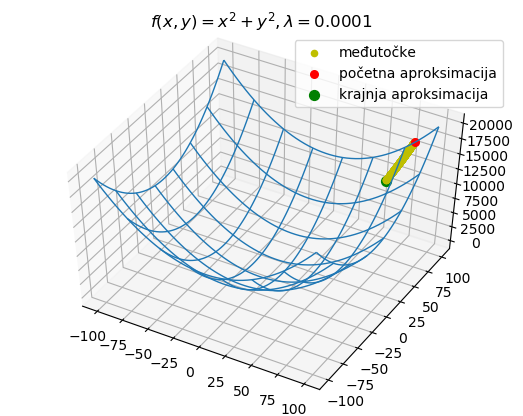

In [81]:
x,y = sp.symbols('x y')

def f(x,y):
    return x**2 + y**2

aproks, history = grad_met(f(x,y), [x,y], 0.0001, [80,100])

for el in history:
    el.extend([f(el[0],el[1])])
    
X = []
Y = []
Z = []
for i in range(len(history)-2):
    X.extend([history[i+1][0]])
    Y.extend([history[i+1][1]])
    Z.extend([history[i+1][2]])

%matplotlib agg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-100, 100), np.linspace(-100, 100))
z = f(x,y)
ax.plot_wireframe(x, y, z, rstride=7, cstride=7, linewidth=1)
ax.scatter(X, Y, Z, s=20, c='y', label='međutočke')
ax.scatter(X[0], Y[0], Z[0], s=30, c='r', label='početna aproksimacija')
ax.scatter(X[-1], Y[-1], Z[-1], s=50, c='g', label='krajnja aproksimacija')
ax.legend()
ax.set_title('$f(x,y) = x^2 + y^2, \lambda = 0.0001$', y=1.08 )
ax.view_init(elev=50)

fig

S druge strane, ona može divergirati čak i na konveksnim funkcijama ako stavimo prevelik $\lambda$. Na ovom primjeru npr. $\lambda = 1.1$

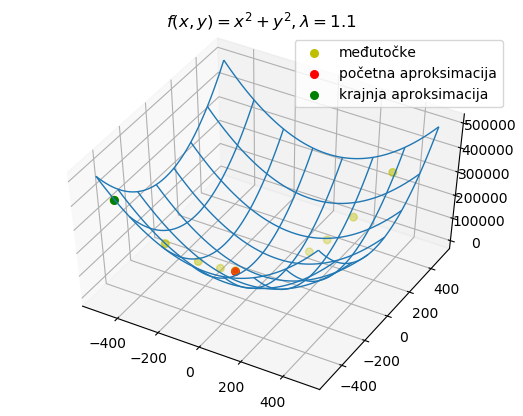

In [82]:
def grad_met(f, var, lamda, aproks):
    lista = [aproks]
    # Ovo moramo promijeniti jer bismo dobili 
    # overflow da stavimo 1000 iteracija.
    for i in range(10):
        temp = np.asarray(sp.lambdify(var, grad(f, var))(aproks[0], aproks[1]))
        new = aproks - lamda * temp
        if np.linalg.norm(aproks - new) < 10**-10:
            return new, lista
        aproks = new
        lista.append(np.ndarray.tolist(aproks))
    return aproks, lista

x,y = sp.symbols('x y')

def f(x,y):
    return x**2 + y**2

aproks, history = grad_met(f(x,y), [x,y], 1.1, [80,100])

for el in history:
    el.extend([f(el[0],el[1])])
    
X = []
Y = []
Z = []
for i in range(len(history)-2):
    X.extend([history[i+1][0]])
    Y.extend([history[i+1][1]])
    Z.extend([history[i+1][2]])

%matplotlib agg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-500, 500), np.linspace(-500, 500))
z = f(x,y)
ax.plot_wireframe(x, y, z, rstride=7, cstride=7, linewidth=1)
ax.scatter(X, Y, Z, s=30, c='y', label='međutočke')
ax.scatter(X[0], Y[0], Z[0], s=30, c='r', label='početna aproksimacija')
ax.scatter(X[-1], Y[-1], Z[-1], s=30, c='g', label='krajnja aproksimacija')
ax.legend()
ax.set_title('$f(x,y) = x^2 + y^2, \lambda = 1.1$', y=1.08 )
ax.view_init(elev=50)

fig

## Newtonova metoda

**Algoritam** (tražimo lokalni **minimum**):

$x \gets$ slučajno odabrani vektor <br/>
**do**: <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x \gets (x - H_f(x)^{-1}  \nabla f(x))$ <br/>
**while** nije ispunjen uvjet zaustavljanja <br/>
**return $x$** <br/>

Napomena: Za maksimum bi bilo $x \gets (x + H_f(x)^{-1}  \nabla f(x))$.

In [83]:
def newton(f, var, aproks):
    lista = [aproks]
    for i in range(1000):
        temp = hess(f,var).inv()*sp.Matrix(grad(f,var))
        temp2 = np.asarray( sp.lambdify(var,temp)(aproks[0], aproks[1]) )
        temp2 = temp2.flatten()
        new = aproks - temp2
        if np.linalg.norm(aproks - new) < 10**-10:
            return new, lista
        aproks = new
        lista.append(np.ndarray.tolist(aproks))
    return aproks, lista    

**Primjer 9.** Iskoristimo Newtonovu metodu na funkciji $f(x,y) = log(1+x^2) + y^2$ s inicijalnom aproksimacijom $(0.5,2)$.

Aproksimacije:
  0.500000  2.000000  4.223144
 -0.333333  0.000000  0.105361
  0.083333  0.000000  0.006920
 -0.001166  0.000000  0.000001
  0.000000  0.000000  0.000000
  0.000000  0.000000  0.000000


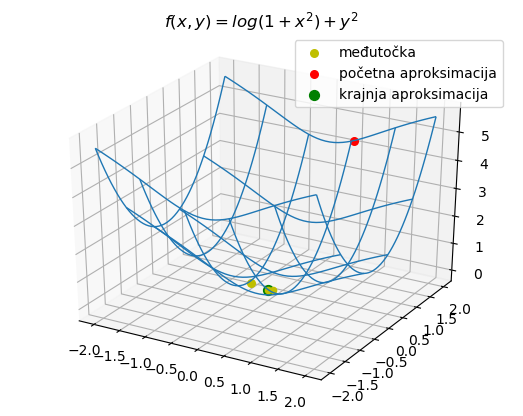

In [84]:
x,y = sp.symbols('x y')
def f(x,y):
    return sp.log(1+x**2) + y**2

aproks, history = newton(f(x,y), [x,y], [0.5,2])
for el in history:
    el.extend([f(el[0],el[1])])
    
print("Aproksimacije:")
for row in history:
    for val in row:
        sys.stdout.write('%10f' % val)
    sys.stdout.write("\n")

x,y = sp.symbols('x y')
def f(x,y):
    return sp.log(1+x**2) + y**2

%matplotlib agg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-2, 2), np.linspace(-2, 2))
z = np.log(1+x**2) + y**2
ax.plot_wireframe(x, y, z, rstride=10, cstride=10, linewidth=1, zorder=0)

# Zbog buga ne radi kada koordinate stavim u listu, nešto krivo tumači kao boju.
for el in history:  
    ax.scatter(el[0], el[1], el[2], s=20, c='y', zorder=1)
ax.scatter(history[1][0], history[1][1], history[1][2],
           s=30, c='y', label='međutočka')
first = history[0]
last = history[-1]
ax.scatter(first[0], first[1], first[2],
           s=30, c='r', zorder=2, label='početna aproksimacija')
ax.scatter(last[0], last[1], last[2],
           s=50, c='g', zorder=3, label='krajnja aproksimacija')
ax.legend()
ax.set_title('$f(x,y) = log(1+x^2) + y^2$', y=1.08)

fig

## Hill climbing

**Algoritam:**

$s_0 \gets$ generiraj početno stanje <br/>
$s \gets s_0 $ <br/>
**do:** <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; generiraj $N(s)$ <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; pronađi $s'\in N(s)$ td. &nbsp;$f(s') \ge f(s''), \forall s'' \in N(s)$ <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **if** $f(s') > f(s)$ <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s \gets s'$ <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **else** stop <br/>
**while** s je ažurirana <br/>
**return** s <br/>

In [85]:
def hill_climbing(f,var,size,start,repeat):
    np.random.seed()
    temp = sp.lambdify(var,f)(start[0], start[1])
    best = [start[0], start[1], temp]
    lista = [best]
    for i in range(repeat):
        okolina = [ [best[0] + np.random.uniform(-1, 1), 
                     best[1] + np.random.uniform(-1, 1)] for i in range(size)]
        values = [ sp.lambdify(var,f)(okolina[j][0], okolina[j][1]) 
                  for j in range(size) ]
        temp = max(values)
        if(temp > best[2]):
            k = values.index(temp)
            best = [ okolina[k][0], okolina[k][1], temp ]
        lista.append(best)
    return best, lista

**Primjer 10.** Iskoristimo Hill Climbing algoritam na funkciji $f(x,y) = sin( \frac{x}{10} ) + cos( \frac{y}{10} )$ s inicijalnom aproksimacijom $(6,7)$.

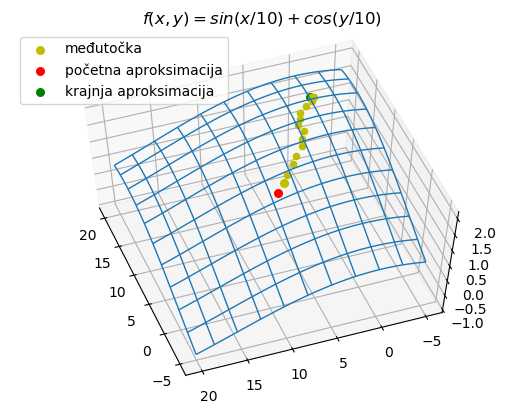

In [86]:
x,y = sp.symbols('x y')
def f(x,y):
    return sp.sin(x/10) + sp.cos(y/10)

aproks, history = hill_climbing(f(x,y), [x,y], 10, [6,7], 20)

%matplotlib agg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-5, 20), np.linspace(-5, 20))
z = np.sin(x/10) + np.cos(y/10)
ax.plot_wireframe(x, y, z, rstride=5, cstride=5, linewidth=1)

# Zbog buga ne radi kada koordinate stavim u listu, nešto krivo tumači kao boju.
for el in history:  
    ax.scatter(el[0], el[1], el[2], s=20, c='y', zorder=-3)
ax.scatter(history[1][0], history[1][1], history[1][2],
           s=30, c='y', zorder=2, label='međutočka')
first = history[0]
last = history[-1]
ax.scatter(first[0], first[1], first[2],
           s=30, c='r', zorder=2, label='početna aproksimacija')
ax.scatter(last[0], last[1], last[2],
           s=30, c='g', zorder=3, label='krajnja aproksimacija')
ax.legend()
ax.view_init(elev=60,azim=160)
ax.set_title('$f(x,y) = sin( x/10 ) + cos( y/10 )$', y=1.08)

fig

            x         y    f(x,y)
0    6.000000  7.000000  1.329485
1    6.681923  6.119572  1.438093
2    7.369873  5.529348  1.523047
3    8.247180  4.632066  1.628981
4    9.004763  3.968157  1.705919
5    9.783018  3.097054  1.781974
6   10.659673  2.807313  1.836110
7   11.464217  2.225409  1.886636
8   12.416935  2.534516  1.914385
9   13.074332  2.086188  1.943838
10  13.806312  1.795898  1.965890
11  14.633940  0.884450  1.990329
12  15.042069  0.095347  1.997738
13  15.655039 -0.332230  1.999434
14  15.656949 -0.142947  1.999885
15  15.656949 -0.142947  1.999885
16  15.656949 -0.142947  1.999885
17  15.656949 -0.142947  1.999885
18  15.825489  0.043971  1.999921
19  15.825489  0.043971  1.999921
20  15.825489  0.043971  1.999921


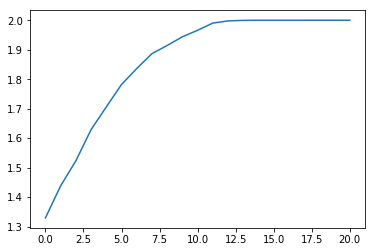

In [87]:
history.insert(0,['x','y','f(x,y)'])
my_path = os.path.dirname('__file__')
csvfile = os.path.join(my_path, "aproksimacije.csv")

with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    writer.writerows(history)
    
df = pd.read_csv('aproksimacije.csv')
print(df)

%matplotlib inline
df['f(x,y)'].plot()

**Literatura:**

[1] P.Pandžić, J.Tambača,_Diferencijalni račun funkcija više varijabli_ (skripta), PMF-MO, Zagreb, 2015. <br/>
[2] G.Nogo, _Meta-heuristike_ (predavanje), PMF-MO, Zagreb, 2017. <br/>
[3] D.B.Fogel, Z.Michalewicz, _How to Solve It: Modern Heuristics_, Springer,  Berlin, 2004. <br/>
[4] https://www.pmf.unizg.hr/_download/repository/PREDAVANJE5.pdf, Zadnje pristupljeno: 6.4.2018.